# Import Python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
!pip install imblearn

from imblearn.under_sampling import NearMiss

# Data Preprocessing

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isnull().sum().sum()

0

Remove features like RowNumber, CustomerId, Surname

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

To explore data and the importance of various features,
1. find correlation between different features
2. plot graphs to find relationships input variables and target variables

In [11]:
# Finding Correlation
df.corr()

C:\Users\Aarav\AppData\Local\Temp\ipykernel_14488\1509827321.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [12]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: title={'center': 'Exited'}>

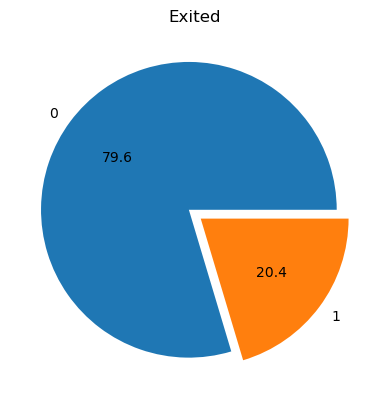

In [13]:
df.groupby('Exited').size().plot(kind='pie',autopct='%1.1f',title='Exited',explode=(0.05,0.05))

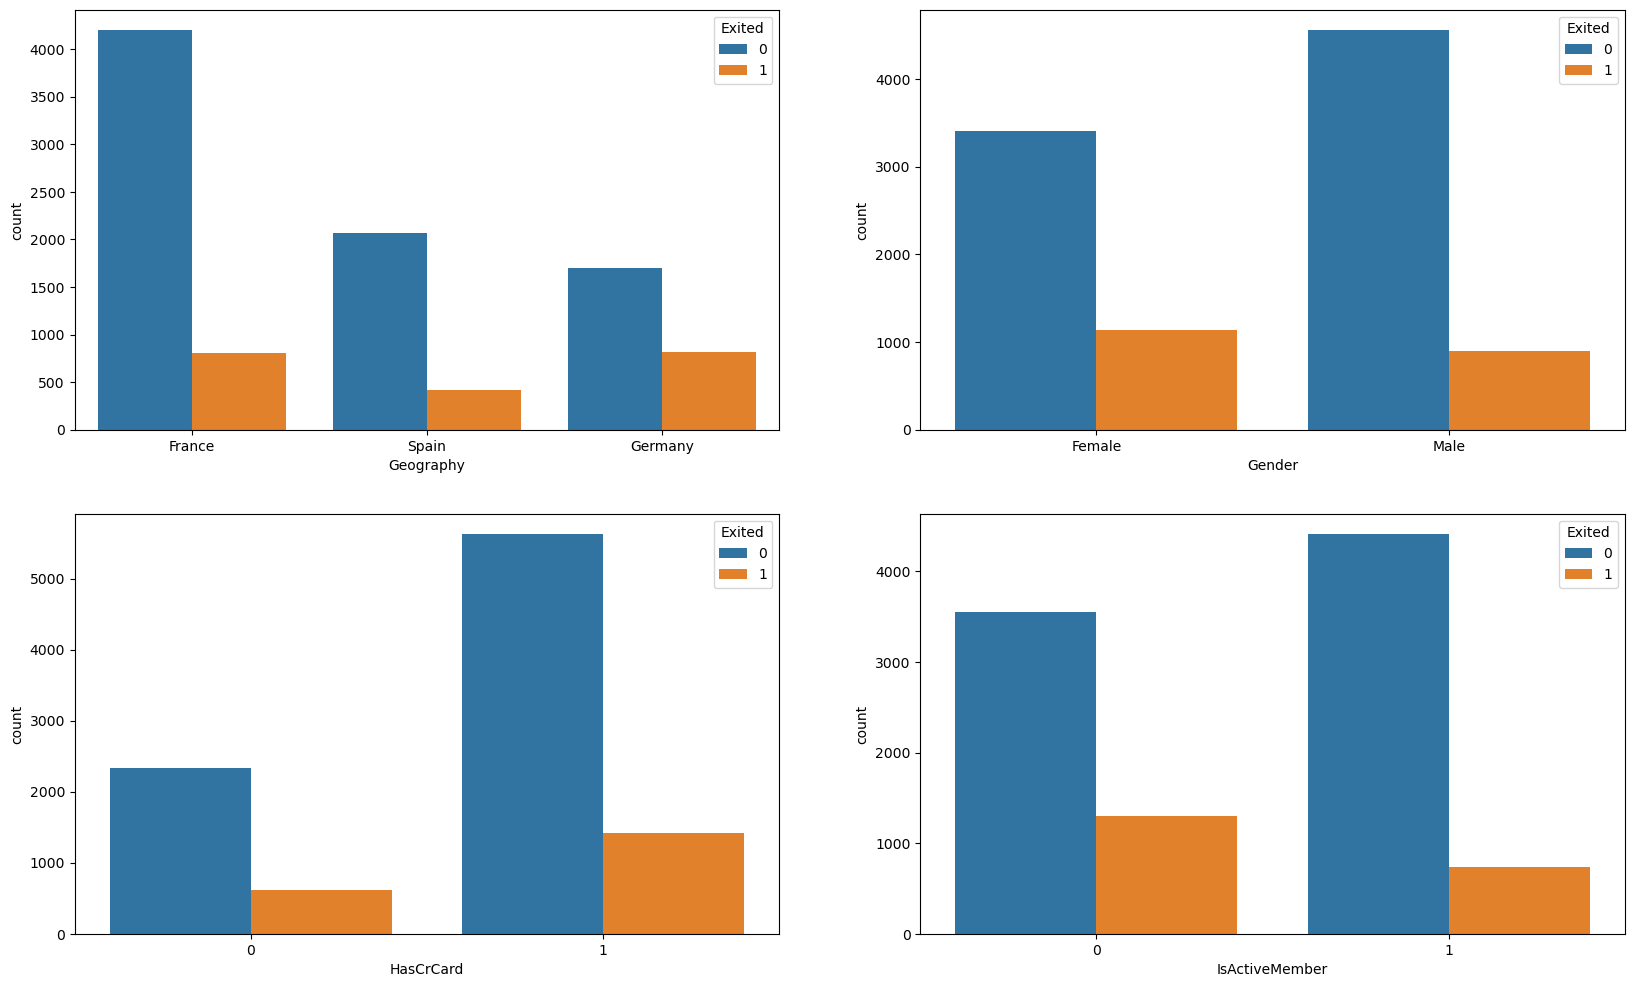

In [14]:
# Relations based on the categorical data attributes

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,12),)
sns.countplot(data=df,x='Geography',hue='Exited',ax=axes[0][0])
sns.countplot(data=df,x='Gender',hue='Exited',ax=axes[0][1])
sns.countplot(data=df,x='HasCrCard',hue='Exited',ax=axes[1][0])
sns.countplot(data=df,x='IsActiveMember',hue='Exited',ax=axes[1][1])
plt.show()

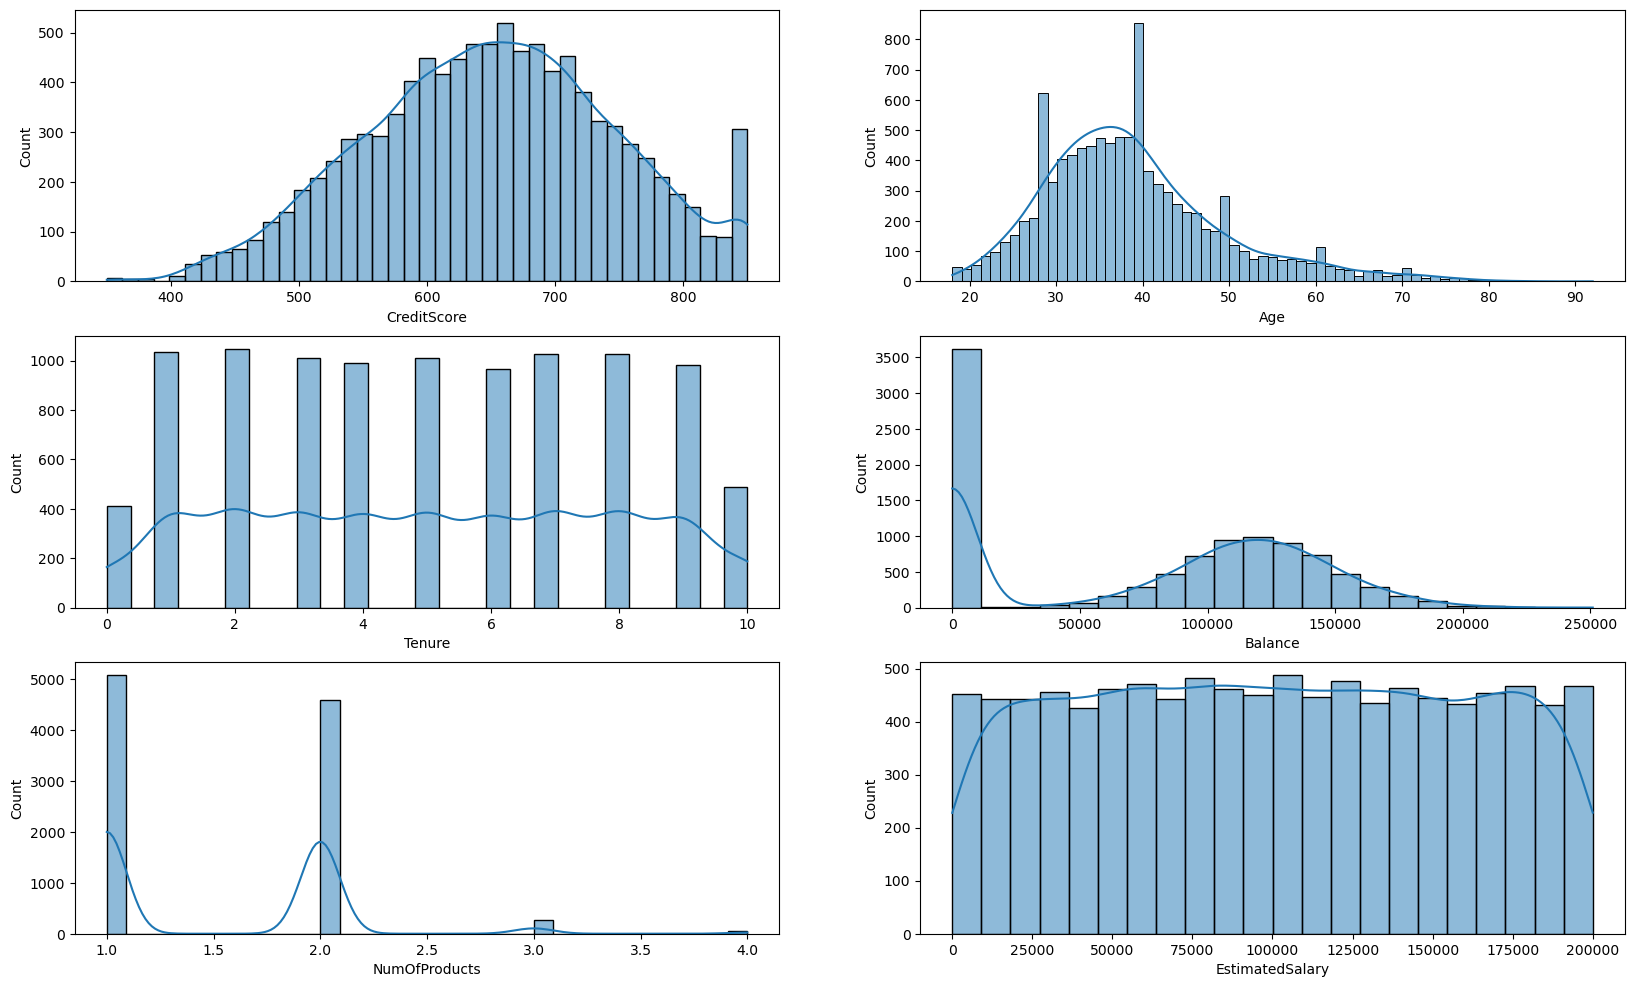

In [15]:
# Distributions of all continuous features.

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,12))
sns.histplot(df['CreditScore'],ax=axes[0][0],kde=True)
sns.histplot(df['Age'],ax=axes[0][1],kde=True)
sns.histplot(df['Tenure'],ax=axes[1][0],kde=True)
sns.histplot(df['Balance'],ax=axes[1][1],kde=True)
sns.histplot(df['NumOfProducts'],ax=axes[2][0],kde=True)
sns.histplot(df['EstimatedSalary'],ax=axes[2][1],kde=True)

plt.show()

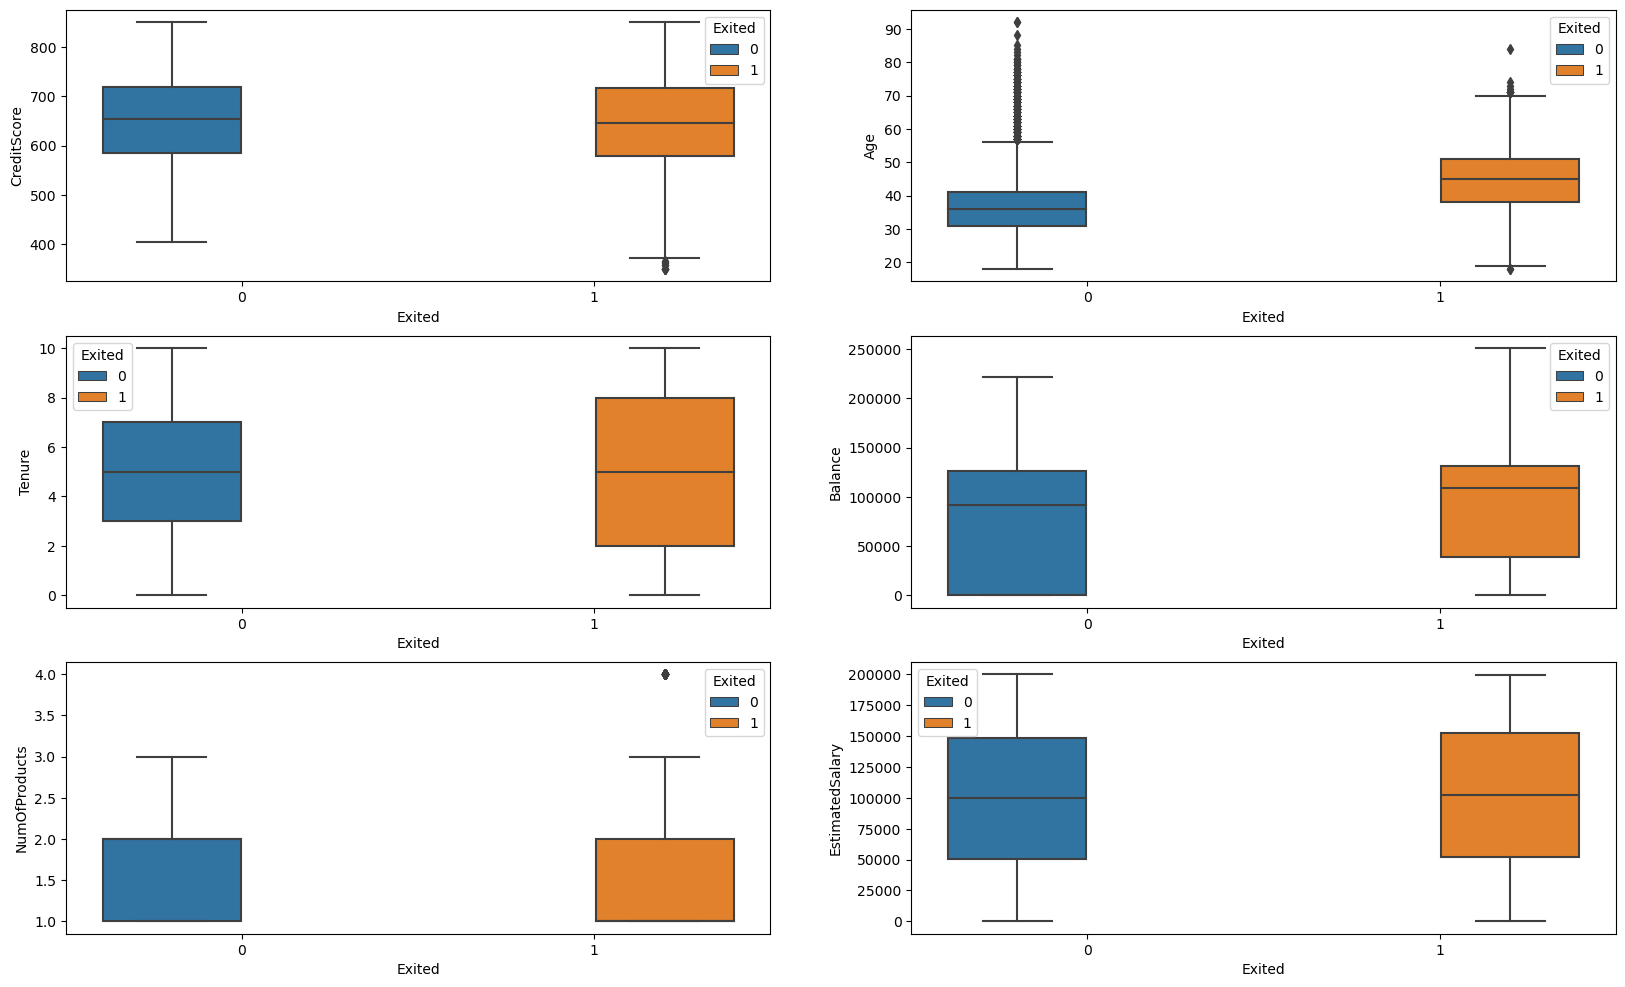

In [16]:
# Relations based on continuous data attributes

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,12))
sns.boxplot(data=df,y='CreditScore',x='Exited',hue='Exited',ax=axes[0][0])
sns.boxplot(data=df,y='Age',x='Exited',hue='Exited',ax=axes[0][1])
sns.boxplot(data=df,y='Tenure',x='Exited',hue='Exited',ax=axes[1][0])
sns.boxplot(data=df,y='Balance',x='Exited',hue='Exited',ax=axes[1][1])
sns.boxplot(data=df,y='NumOfProducts',x='Exited',hue='Exited',ax=axes[2][0])
sns.boxplot(data=df,y='EstimatedSalary',x='Exited',hue='Exited',ax=axes[2][1])

plt.show()

In [17]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Feature Engineering

In [18]:
X = df.iloc[:,:-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [19]:
Y = df.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Applying One Hot Encoding for categorical features like Geography, Gender

In [20]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
X = X.join(pd.get_dummies(df['Geography'],drop_first =True))

In [22]:
X.drop(['Geography'],axis=1,inplace=True)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,1


In [23]:
X = X.join(pd.get_dummies(df['Gender'],drop_first=True))
X.drop(['Gender'],axis=1,inplace=True)

In [24]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# Balancing the data

In [25]:
nm = NearMiss()
X_res, Y_res = nm.fit_resample(X, Y)
Y_res.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

# Train Test split and feature scaling

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_res, Y_res, train_size=0.8, random_state=11)

In [27]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3259, 11) (3259,) (815, 11) (815,)


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Building a Deep Neural Network

In [29]:
dnn = Sequential()
dnn.add(Dense(11,activation='relu'))
dnn.add(Dense(7,activation='relu'))
dnn.add(Dense(3,activation='relu'))
dnn.add(Dense(1,activation='sigmoid'))

dnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
earlystopping = EarlyStopping(min_delta=0.0001, patience=100)

Training the model

In [31]:
dnn.fit(x_train, y_train, batch_size=20, epochs=1000, validation_split=0.2, callbacks=earlystopping)

Epoch 1/1000
131/131 [==============================] - 1s 2ms/step - loss: 0.6229 - accuracy: 0.6647 - val_loss: 0.5383 - val_accuracy: 0.7761
Epoch 2/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.8140 - val_loss: 0.4434 - val_accuracy: 0.8620
Epoch 3/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8719 - val_loss: 0.3933 - val_accuracy: 0.8880
Epoch 4/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8865 - val_loss: 0.3627 - val_accuracy: 0.8988
Epoch 5/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8945 - val_loss: 0.3398 - val_accuracy: 0.8988
Epoch 6/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8991 - val_loss: 0.3227 - val_accuracy: 0.9034
Epoch 7/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.9033 - val_loss: 0.3076 - val_accuracy:

131/131 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9359 - val_loss: 0.1852 - val_accuracy: 0.9233
Epoch 58/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9352 - val_loss: 0.1840 - val_accuracy: 0.9340
Epoch 59/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1640 - accuracy: 0.9359 - val_loss: 0.1831 - val_accuracy: 0.9294
Epoch 60/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1641 - accuracy: 0.9363 - val_loss: 0.1828 - val_accuracy: 0.9294
Epoch 61/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1625 - accuracy: 0.9367 - val_loss: 0.1809 - val_accuracy: 0.9279
Epoch 62/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1629 - accuracy: 0.9359 - val_loss: 0.1843 - val_accuracy: 0.9248
Epoch 63/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9340 - val_loss: 0.1864 - val_accuracy: 0.9279

131/131 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.9436 - val_loss: 0.2071 - val_accuracy: 0.9248
Epoch 114/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9436 - val_loss: 0.2046 - val_accuracy: 0.9218
Epoch 115/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1479 - accuracy: 0.9421 - val_loss: 0.2045 - val_accuracy: 0.9218
Epoch 116/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.9432 - val_loss: 0.2035 - val_accuracy: 0.9202
Epoch 117/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9421 - val_loss: 0.2028 - val_accuracy: 0.9248
Epoch 118/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1468 - accuracy: 0.9428 - val_loss: 0.2028 - val_accuracy: 0.9233
Epoch 119/1000
131/131 [==============================] - 0s 1ms/step - loss: 0.1464 - accuracy: 0.9471 - val_loss: 0.2044 - val_accuracy: 

In [32]:
dnn.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Model Evaluation

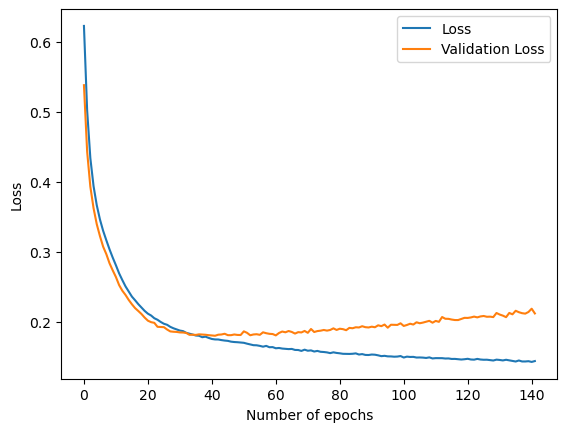

In [33]:
# Potting losses
plt.plot(dnn.history.history['loss'], label='Loss')
plt.plot(dnn.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

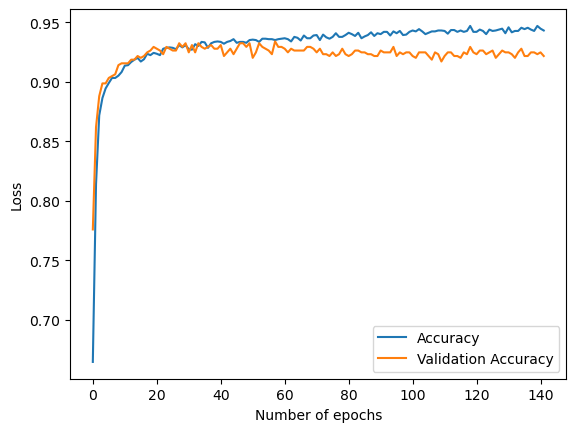

In [34]:
# Plotting Accuracies
plt.plot(dnn.history.history['accuracy'], label='Accuracy')
plt.plot(dnn.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing the model

In [35]:
y_pred = dnn.predict(x_test)
y_pred = y_pred>0.5

26/26 [==============================] - 0s 948us/step


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       412
           1       0.95      0.88      0.92       403

    accuracy                           0.92       815
   macro avg       0.92      0.92      0.92       815
weighted avg       0.92      0.92      0.92       815



In [46]:
print(f'Precision of the model is: {precision_score(y_test, y_pred)* 100} percent.')
print(f'Recall of the model is: {recall_score(y_test, y_pred)* 100} percent.')
print(f'F1 score of the model is: {f1_score(y_test, y_pred)* 100} percent.')
print(f'Overall accuracy of the model is: {accuracy_score(y_test, y_pred)* 100} percent.')

Precision of the model is: 95.43010752688173 percent.
Recall of the model is: 88.08933002481389 percent.
F1 score of the model is: 91.61290322580645 percent.
Overall accuracy of the model is: 92.02453987730061 percent.
